In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/home/nstiegle/promising_candidates.csv")

<Axes: xlabel='tstart', ylabel='signal_frequency'>

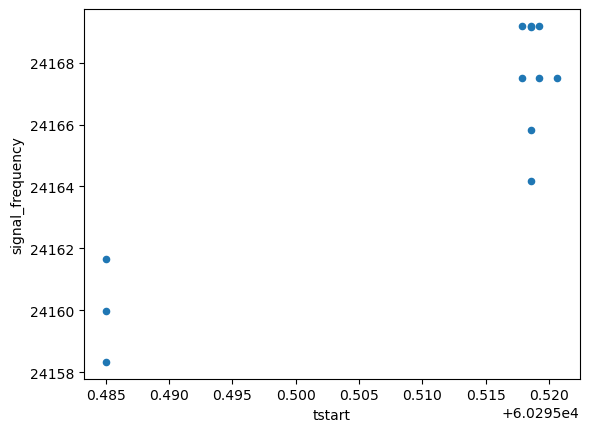

In [3]:
data.plot.scatter("tstart" , "signal_frequency")

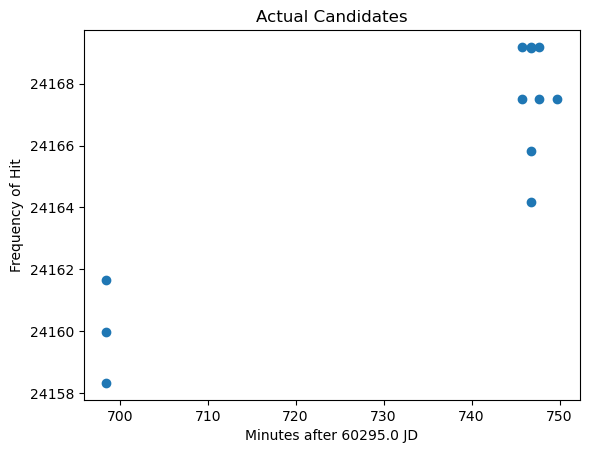

In [4]:
plt.scatter((data.tstart - 6.0295e4) * 1440, data.signal_frequency)
plt.xlabel(f"Minutes after {6.0295e4} JD")
plt.ylabel("Frequency of Hit")
plt.title("Actual Candidates")
plt.show()

In [5]:
# Read in the data
import os

# Check which server we're on (in case the data is in different places on different servers)
import socket
hostname = socket.gethostname()

# Get paths to data
if hostname == "blpc1" or hostname == "blpc2":
    raise Exception("Not coded up yet")
    full_dataset_path = "/datax/scratch/nstieg/25GHz_higher.pkl"
    coherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_coherent.pkl"
    incoherent_dataset_path = "/datax/scratch/nstieg/25GHz_higher_incoherent.pkl"
elif hostname == "cosmic-gpu-1":
    # Check if data already exists
    filename = "/mnt/cosmic-gpu-1/data0/nstiegle/data_on_candidate.pkl"
    if os.path.isfile(filename):
         df_small = pd.read_csv(filename)
    else:
        full_dataset_path = "/mnt/cosmic-gpu-1/data0/nstiegle/25GHz_higher.pkl"
        # Read in data
        df = pd.read_pickle(full_dataset_path)

        # Just get the data from the candidate
        df_small = df[(df.source_name == "3073619025268414208") + # Coherent beam on source 
                ((df.source_name == "Incoherent") *               # Incoherent beam for it
                ((df.ra_hours - 8.63873333).abs() < 0.1) * ((df.dec_degrees - -0.69966).abs() < 0.1))]

        # Save human readable dates
        df_small["tstart_h"] = Time(df_small["tstart"], format="mjd").datetime

        # Save data if it doesn't exist
        df_small.to_csv("/mnt/cosmic-gpu-1/data0/nstiegle/data_on_candidate.pkl")
else:
    raise Exception("Data path not known")

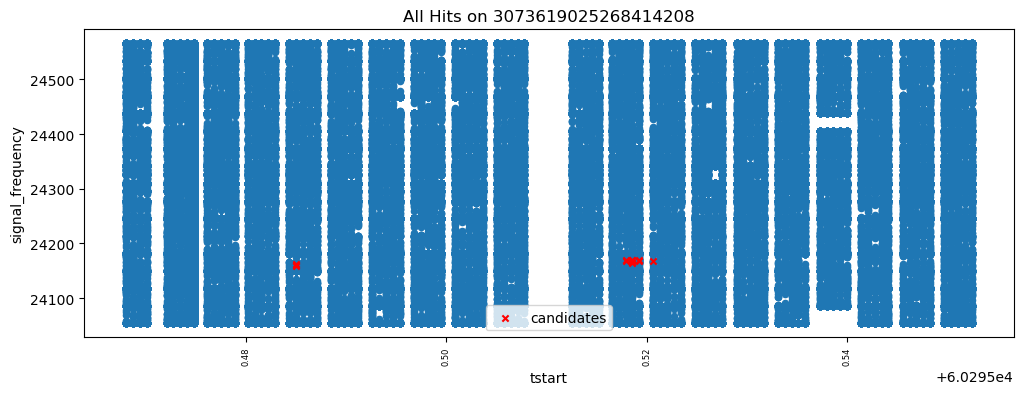

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))  # Width = 12 inches, Height = 4 inches
df_small.plot.scatter("tstart", "signal_frequency", ax=ax)
data.plot.scatter("tstart", "signal_frequency", ax=ax, zorder=100, marker='x', color='red', label='candidates')
plt.legend()
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=6)  # Set x-tick font size to 8
plt.title("All Hits on 3073619025268414208")
plt.show()

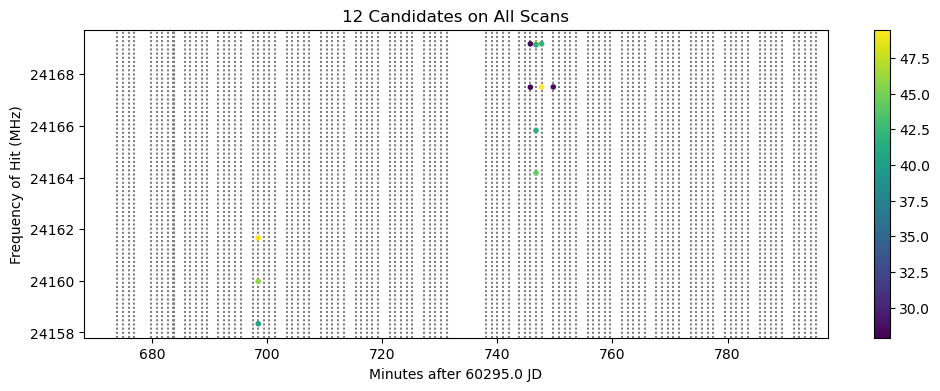

In [34]:
fig, ax = plt.subplots(figsize=(12, 4))  # Width = 12 inches, Height = 4 inches
s = ax.scatter((data.tstart - 6.0295e4) * 1440, data.signal_frequency, marker='.', c=data.signal_drift_rate)
plt.colorbar(s)
for tstart in df_small.tstart.unique():
        ax.axvline((tstart - 6.0295e4) * 1440, dashes=[1, 1, 1, 1], color='grey', zorder=-1)
plt.xlabel(f"Minutes after {6.0295e4} JD")
plt.ylabel("Frequency of Hit (MHz)")
plt.title("12 Candidates on All Scans")
plt.show()